#1.) Import all necessary libraries

In [68]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random as rand
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 2.) Create a dataframe for the dataset using pandas

In [69]:
df = pd.read_csv('car_prices.csv')

In [70]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


#  3.) Create a new dataframe with only rows of data that are a Ford F-150, and
make sure to reset the index
(.reset_index(drop=True, inplace=True))

Get rid of the make and model columns since we know all rows are F-150 cars

Make a new dataframe with only rows with a "Ford" car make (brand), by taking df[df['model'] == 'F-150']

In [71]:
df_F150 = df[df['model'] == 'F-150'].reset_index(drop=True)

In [72]:
df_F150

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,46.0,51189.0,gray,gray,ford motor credit company llc pd,19700.0,20200.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
1,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,46.0,28687.0,gray,black,ford motor credit company llc pd,26700.0,30500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
2,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,39.0,27465.0,black,gray,ford motor credit company llc pd,26300.0,28800.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
3,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,35.0,93858.0,white,gray,aaero sweet company,18900.0,19500.0,Wed Dec 17 2014 12:15:00 GMT-0800 (PST)
4,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,41.0,46444.0,red,black,ford motor credit company llc pd,26300.0,25600.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14474,2010,Ford,F-150,SVT Raptor,supercab,automatic,1ftex1ev0afa23790,pa,43.0,57388.0,orange,black,r hollenshead auto sales inc,34400.0,34250.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
14475,2008,Ford,F-150,FX4,supercrew,automatic,1ftpw14v98fa62904,nv,38.0,79088.0,white,beige,unique autos,17500.0,18700.0,Fri Jun 19 2015 04:55:00 GMT-0700 (PDT)
14476,2007,Ford,F-150,XLT,supercab,automatic,1ftpx12v07fa11502,fl,3.0,85534.0,red,gray,onemain rem/orange county motorsports llc,9875.0,10400.0,Fri Jun 19 2015 03:20:00 GMT-0700 (PDT)
14477,2001,Ford,F-150,Lariat,supercab,automatic,2ftrx18wx1ca18663,nv,27.0,86500.0,green,gray,premier motors inc,3625.0,6150.0,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)


In [73]:
df_F150.drop(['make', 'model'], axis=1, inplace=True)

In [74]:
df_F150

,year,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2012,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,46.0,51189.0,gray,gray,ford motor credit company llc pd,19700.0,20200.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
1,2012,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,46.0,28687.0,gray,black,ford motor credit company llc pd,26700.0,30500.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
2,2012,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,39.0,27465.0,black,gray,ford motor credit company llc pd,26300.0,28800.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
3,2012,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,35.0,93858.0,white,gray,aaero sweet company,18900.0,19500.0,Wed Dec 17 2014 12:15:00 GMT-0800 (PST)
4,2012,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,41.0,46444.0,red,black,ford motor credit company llc pd,26300.0,25600.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14474,2010,SVT Raptor,supercab,automatic,1ftex1ev0afa23790,pa,43.0,57388.0,orange,black,r hollenshead auto sales inc,34400.0,34250.0,Fri Jun 19 2015 02:00:00 GMT-0700 (PDT)
14475,2008,FX4,supercrew,automatic,1ftpw14v98fa62904,nv,38.0,79088.0,white,beige,unique autos,17500.0,18700.0,Fri Jun 19 2015 04:55:00 GMT-0700 (PDT)
14476,2007,XLT,supercab,automatic,1ftpx12v07fa11502,fl,3.0,85534.0,red,gray,onemain rem/orange county motorsports llc,9875.0,10400.0,Fri Jun 19 2015 03:20:00 GMT-0700 (PDT)
14477,2001,Lariat,supercab,automatic,2ftrx18wx1ca18663,nv,27.0,86500.0,green,gray,premier motors inc,3625.0,6150.0,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)


#4.) Create a reservoir sample function

In [75]:
import random

def reservoir_sampling(m, data):
    # Intialize the reservoir with the first 'm' elements
    reservoirindex = list(range(m))

    # Process the remaining items
    for i in range(m, len(data)):
        j = random.randint(0, i)
        if j < m:
            reservoirindex[j] = i

    # Return the sampled data using the selected indices
    global cleaned_df

    cleaned_df = data.iloc[reservoirindex].dropna()
    return cleaned_df

In [76]:
reservoir_sampling(15000, df)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
515882,2014,Toyota,Corolla,LE,sedan,automatic,5yfburhe4ep079915,pa,35.0,34266.0,white,black,avis corporation,12500.0,12700.0,Fri Jun 05 2015 02:00:00 GMT-0700 (PDT)
46502,2007,Toyota,Camry,XLE,Sedan,automatic,4t1be46k87u610365,pa,44.0,111998.0,silver,gray,gnm auto sales inc,7075.0,8650.0,Fri Jan 09 2015 09:00:00 GMT-0800 (PST)
310843,2011,Infiniti,G Sedan,G37x,G Sedan,automatic,jn1cv6ar7bm412378,nj,44.0,18375.0,white,black,nissan infiniti lt,19550.0,18400.0,Wed Feb 18 2015 01:30:00 GMT-0800 (PST)
15971,2008,HUMMER,H3,Alpha,SUV,automatic,5gten13l688122550,ny,28.0,86936.0,gray,black,m and t bank,16050.0,14100.0,Wed Dec 17 2014 09:30:00 GMT-0800 (PST)
457518,2013,Chevrolet,Captiva Sport,LTZ Fleet,SUV,automatic,3gnal4ek4ds583093,ga,37.0,56534.0,gray,gray,the hertz corporation,12600.0,12600.0,Tue May 26 2015 02:30:00 GMT-0700 (PDT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87165,2014,Chevrolet,Camaro,LS,Coupe,automatic,2g1fa1e30e9213147,ca,49.0,1145.0,red,black,high bid trading co inc,18500.0,20000.0,Wed Jan 07 2015 12:15:00 GMT-0800 (PST)
25474,2014,Kia,Forte,LX,Sedan,automatic,knafx4a60e5210850,wi,38.0,12835.0,red,gray,kia motors america inc,12550.0,11900.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
365335,2012,Nissan,Sentra,2.0 SR,Sedan,automatic,3n1ab6ap2cl680295,fl,44.0,35525.0,blue,gray,nissan-infiniti lt,10500.0,12000.0,Wed Mar 04 2015 01:00:00 GMT-0800 (PST)
482761,2015,Hyundai,Accent,GS,hatchback,automatic,kmhct5ae1fu204511,wi,1.0,7525.0,blue,gray,dtag tra,12550.0,5000.0,Wed Jun 03 2015 05:00:00 GMT-0700 (PDT)


In [77]:
cleaned_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
515882,2014,Toyota,Corolla,LE,sedan,automatic,5yfburhe4ep079915,pa,35.0,34266.0,white,black,avis corporation,12500.0,12700.0,Fri Jun 05 2015 02:00:00 GMT-0700 (PDT)
46502,2007,Toyota,Camry,XLE,Sedan,automatic,4t1be46k87u610365,pa,44.0,111998.0,silver,gray,gnm auto sales inc,7075.0,8650.0,Fri Jan 09 2015 09:00:00 GMT-0800 (PST)
310843,2011,Infiniti,G Sedan,G37x,G Sedan,automatic,jn1cv6ar7bm412378,nj,44.0,18375.0,white,black,nissan infiniti lt,19550.0,18400.0,Wed Feb 18 2015 01:30:00 GMT-0800 (PST)
15971,2008,HUMMER,H3,Alpha,SUV,automatic,5gten13l688122550,ny,28.0,86936.0,gray,black,m and t bank,16050.0,14100.0,Wed Dec 17 2014 09:30:00 GMT-0800 (PST)
457518,2013,Chevrolet,Captiva Sport,LTZ Fleet,SUV,automatic,3gnal4ek4ds583093,ga,37.0,56534.0,gray,gray,the hertz corporation,12600.0,12600.0,Tue May 26 2015 02:30:00 GMT-0700 (PDT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87165,2014,Chevrolet,Camaro,LS,Coupe,automatic,2g1fa1e30e9213147,ca,49.0,1145.0,red,black,high bid trading co inc,18500.0,20000.0,Wed Jan 07 2015 12:15:00 GMT-0800 (PST)
25474,2014,Kia,Forte,LX,Sedan,automatic,knafx4a60e5210850,wi,38.0,12835.0,red,gray,kia motors america inc,12550.0,11900.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
365335,2012,Nissan,Sentra,2.0 SR,Sedan,automatic,3n1ab6ap2cl680295,fl,44.0,35525.0,blue,gray,nissan-infiniti lt,10500.0,12000.0,Wed Mar 04 2015 01:00:00 GMT-0800 (PST)
482761,2015,Hyundai,Accent,GS,hatchback,automatic,kmhct5ae1fu204511,wi,1.0,7525.0,blue,gray,dtag tra,12550.0,5000.0,Wed Jun 03 2015 05:00:00 GMT-0700 (PDT)


#6.) With cleaned_df being your final data frame, copy the following code

In [78]:
cleaned_df = df

In [80]:
# Drop all object types
cleaned_df.drop(cleaned_df.select_dtypes(include=['object']).columns, axis=1, inplace=True)

In [81]:
cleaned_df.fillna(cleaned_df.mean(), inplace=True)

cleaned_df.replace([np.inf, -np.inf], np.nan ,inplace=True)
cleaned_df.fillna(cleaned_df.mean(), inplace=True)

X = cleaned_df[['year', 'condition', 'odometer', 'sellingprice']].values
y = cleaned_df['mmr'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

predicted_values = knn.predict(X_test_scaled)
errors = predicted_values - y_test
errors = errors.reshape(-1, 1)

errors = abs(errors)

print(predicted_values, y_test)

[14680. 15770. 25160. ... 14290. 26120. 15490.] [14300. 13300. 23400. ... 13600. 22700. 17450.]


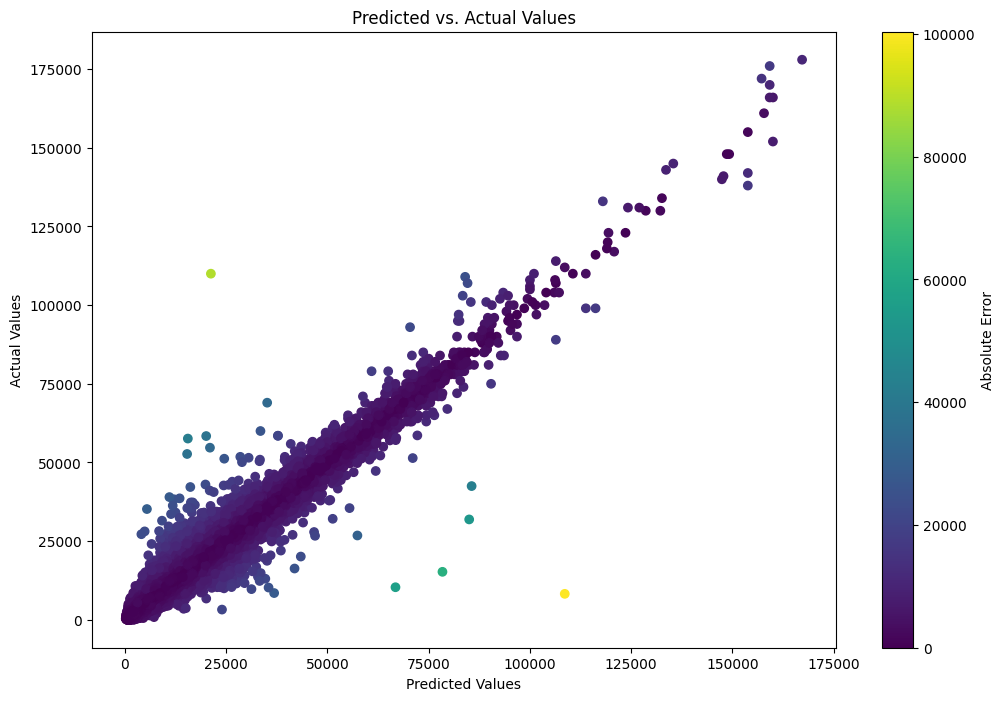

In [90]:
fig = plt.figure(figsize=(12, 8))

fig = plt.scatter(x=predicted_values, y=y_test, c=errors)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.colorbar(label='Absolute Error')
plt.show()